<img src="../Images/DSC_Logo.png" style="width: 400px;">

# Geospatial Data on Maps

Geospatial data refers to information linked to geographic locations, often represented as coordinates or maps, which is essential for analyzing spatial patterns and relationships. In Python, several libraries are available for visualizing geospatial data; in this notebook, we primarily use Matplotlib and Cartopy for plotting. The library rasterio is used to handle raster data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

### **Example 1 [continued from B2]: Antarctic CO2 concentrations**

Let's visualize the geographic distribution of the key Antarctic ice core stations that have contributed to the reconstruction of atmospheric carbon dioxide (CO2) levels over the past 800,000 years. The geographic information is extracted from the metadata of the dataset (copy saved as "metadata_jason.txt").

In [3]:
# Site data from metadata 
site = ["Dome C", "Vostok", "Siple Dome", "TALDICE", "EDML"]
elevation = [3233, 3488, 621, 2315, 2892]
latitude = [-75.1, -78.47, -81.65, -72.8166, -75.0]
longitude = [123.4, 106.8, -148.82, 159.1833, 0.07]

# Create dataFrame
antarctica = pd.DataFrame({
    "Site": site,
    "Elevation masl": elevation,
    "Lat": latitude,
    "Lon": longitude
})

# Display the DataFrame
print(antarctica)

         Site  Elevation masl      Lat       Lon
0      Dome C            3233 -75.1000  123.4000
1      Vostok            3488 -78.4700  106.8000
2  Siple Dome             621 -81.6500 -148.8200
3     TALDICE            2315 -72.8166  159.1833
4        EDML            2892 -75.0000    0.0700


When we create the axes with `subplot_kw={}`, that tells Matplotlib which projection to use for the entire plot. This means that the coordinate system within the plot will be based on this projection. The Plate Carrée coordinate system represents data on a flat map. Here, the Antarctic region looks much larger than it actually is compared to its size on a globe.

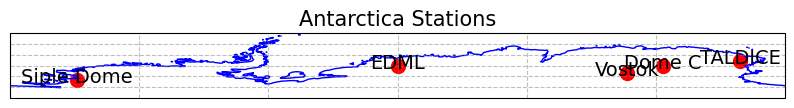

In [4]:
# Plot setup
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines(resolution='50m', color='blue')
ax.gridlines(draw_labels=False, linestyle='--', color='gray', alpha=0.5)

# Plot points
ax.scatter(antarctica['Lon'], antarctica['Lat'],
           color='red', 
           s=100,
           transform=ccrs.PlateCarree())

# Add labels slightly offset
for _, row in antarctica.iterrows():
    ax.text(row['Lon'], row['Lat'] - 1, row['Site'], fontsize=14, ha='center', color='black', transform=ccrs.PlateCarree())

# Extent
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree()) # Longitude (westmost point), Longitude (eastmost point), Latitude (southmost point), Latitude (northmost point)

# Add title
ax.set_title('Antarctica Stations', fontsize=15)

# Show plot
plt.show()

The `SouthPolarStereo` projection is a specific type of map projection designed to represent areas in the Southern Hemisphere, particularly Antarctica. Data points are in the Plate Carrée coordinate system. Cartopy handles the conversion from Plate Carrée coordinates to the South Polar Stereographic projection. We set the extent of the plot in the original Plate Carrée coordinate system. Remember that Antarctica covers all longitudes when investigating the extent.

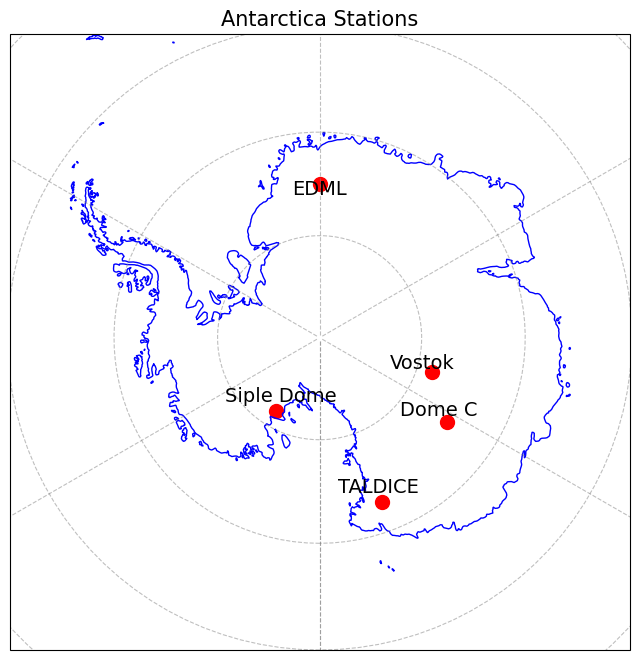

In [5]:
# Plot setup
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.SouthPolarStereo()})
ax.coastlines(resolution='50m', color='blue')
ax.gridlines(draw_labels=False, linestyle='--', color='gray', alpha=0.5)

# Plot points
ax.scatter(antarctica['Lon'], antarctica['Lat'],
           color='red',
           s=100,
           transform=ccrs.PlateCarree())

# Add labels slightly offset
for _, row in antarctica.iterrows():
    ax.text(row['Lon'], row['Lat'] - 1, row['Site'], fontsize=14, ha='center', color='black', transform=ccrs.PlateCarree())

# Extent
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree()) # Longitude (westmost point), Longitude (eastmost point), Latitude (southmost point), Latitude (northmost point)

# Add title
ax.set_title('Antarctica Stations', fontsize=15)

# Show plot
plt.show()

### **Example 2: POLARSTERN cruise PS141 master track**

The PS141 expedition from February 6 to April 14, 2024, studied changes in the East Antarctic Ice Sheet (EAIS) and its impact on global sea levels and climate. Researchers collected geological and geophysical data from the continental shelf between 85°E and 115°E through marine and land investigations. Data from GPS and navigation systems on the RV Polarstern were used to create a master track for reference of investigations. The dataset contains the master track in 10 min resolution. The related [Polarstern expedition website](https://follow-polarstern.awi.de/expedition/antarktis-2023-24/) uses master tracks to visualize navigation routes and data collection points.

**Original dataset:**
Krastel, Sebastian (2024): Master tracks in different resolutions of POLARSTERN cruise PS141, Hobart - Walvis Bay, 2024-02-06 - 2024-04-14 [dataset]. Alfred Wegener Institute, Helmholtz Centre for Polar and Marine Research, Bremerhaven, PANGAEA, https://doi.org/10.1594/PANGAEA.969140             

In [6]:
# Load dataset
path = '../Datasets/PS141_mastertrack.tab' 
track = pd.read_csv(path, 
                    skiprows=21,
                    sep="\t")

# Display the DataFrame (optional)
print(track.head())

          Date/Time  Latitude  Longitude  Speed [kn]  Course [deg]
0  2024-02-06T06:20 -42.88162  147.34153       0.000         270.0
1  2024-02-06T06:30 -42.88162  147.34153       0.000          90.0
2  2024-02-06T06:40 -42.88163  147.34153       0.001         114.4
3  2024-02-06T06:50 -42.88163  147.34153       0.001         251.2
4  2024-02-06T07:00 -42.88162  147.34153       0.001         339.8


**Exercise:** Plot the track of the Polarstern expedition on a map of Antarctica. Ensure that the plot includes both the entire extent of Antarctica and the route of the expedition, represented by a red line. Check the coordinates of the expedition track to determine an appropriate extent that encompasses both the Antarctic region and the track itself. Save the figure to the folder "Figures" after layout adjustements.

In [7]:
# Get the coordinate limits of the track
print("Latitude Min:", track['Latitude'].min())
print("Latitude Max:", track['Latitude'].max())

Latitude Min: -66.80645
Latitude Max: -22.84674


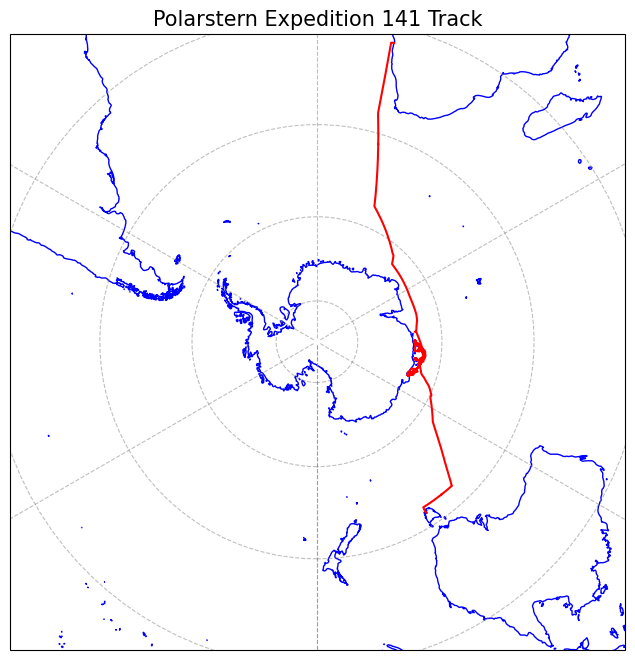

In [8]:
# Plot setup
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.SouthPolarStereo()})
ax.coastlines(resolution='50m', color='blue')
ax.gridlines(draw_labels=False, linestyle='--', color='gray', alpha=0.5)

# Plot the track
ax.plot(track['Longitude'], track['Latitude'], color='red', transform=ccrs.PlateCarree())

# Extent
ax.set_extent([-180, 180, -66.8, -22.9], crs=ccrs.PlateCarree())  

# Add title
ax.set_title('Polarstern Expedition 141 Track', fontsize=15)

# Save the figure to a file
plt.savefig('Figures/polarstern_track.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

### **Example 3 [continued from B2]: Köppen-Geiger maps for 1901–2099**

Raster data consists of grid-based datasets made up of pixels, where each pixel represents a specific value or category. In the case of the Köppen-Geiger climate zones, raster data visually represents the distribution of different climate classifications across geographical areas, allowing for detailed spatial and spatio-temporal analysis of climate patterns.

In [9]:
import rasterio
import cartopy.feature as cfeature

The Köppen-Geiger classification uses complex color definitions for it's visualization. These were downloaded from [the Github repository containing the code for the paper](https://github.com/hylken/Koppen-Geiger_maps).

In [11]:
file_path = '../Datasets/koppen_geiger/koppen_table.csv'
colors = pd.read_csv(file_path)
print(colors.head())
print(colors.columns)

   Class  Major Symbol           Description  Red  Green  Blue
0      1      1     Af  Tropical, rainforest    0      0   255
1      2      1     Am     Tropical, monsoon    0    120   255
2      3      1     Aw    Tropical, savannah   70    170   250
3      4      2    BWh     Arid, desert, hot  255      0     0
4      5      2    BWk    Arid, desert, cold  255    150   150
Index(['Class', 'Major', 'Symbol', 'Description', 'Red', 'Green', 'Blue'], dtype='object')


Multiple options exist to use these colors in the plot. We directly take RGB values from the DataFrame and create a custom colormap using `matplotlib`.

In [13]:
koppen_colors = [(row['Red']/255, row['Green']/255, row['Blue']/255) for idx, row in colors.iterrows()]
koppen_cmap = plt.cm.colors.ListedColormap(koppen_colors)

Let's load the data for the 2071 to 2099 projection with rasterio. 

In [14]:
file_path = '../Datasets/koppen_geiger/koppen_geiger_1p0_2071_2099_ssp245.tiff'
with rasterio.open(file_path) as src:
    data = src.read(1)  # Read the first band
    transform = src.transform  # Get the transformation information

Next, we mask the zero values in the dataset to be not plotted. 

In [15]:
# Mask the zeros in the data
masked_data = np.ma.masked_equal(data, 0)

# Set the color for masked data
koppen_cmap.set_bad(color='white')  # Set the color for masked values (transparent)

The extent definition is essential for accurately placing and displaying the raster data within a geographical context.

In [16]:
# Calculate extent from the transform
# Get the width and height of the raster
width = data.shape[1]
height = data.shape[0]

# Calculate the extents
min_lon, min_lat = transform * (0, height)  # bottom-left corner
max_lon, max_lat = transform * (width, 0)  # top-right corner

# Create extent
extent = [min_lon, max_lon, min_lat, max_lat]

Let's plot the climate classes on the global map!

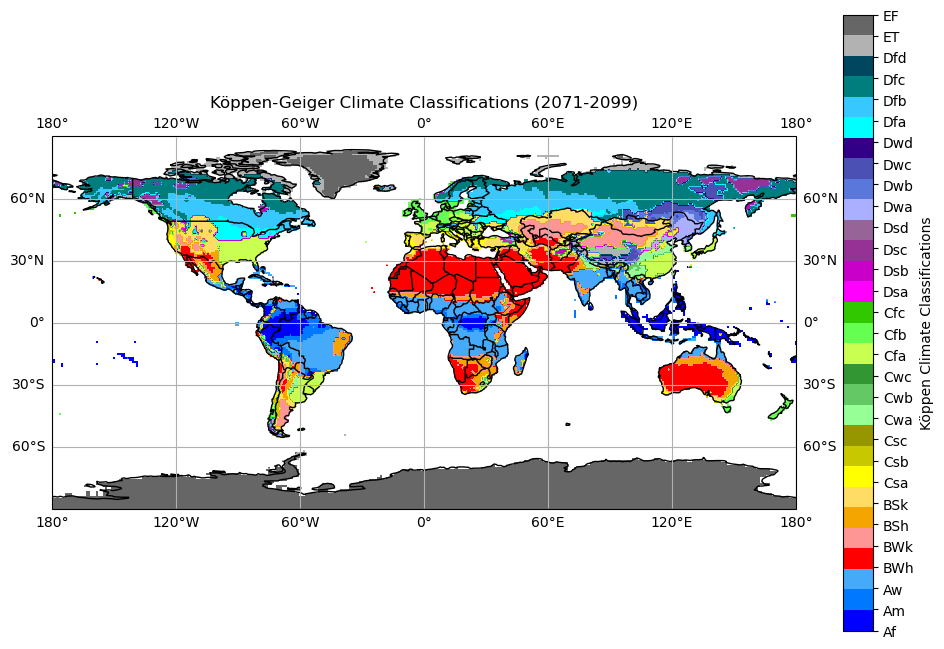

In [17]:
# Plot setup
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Add geographic features for context
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.gridlines(draw_labels=True)

# Plot the data
img = ax.imshow(masked_data, origin='upper', extent=extent, cmap=koppen_cmap, 
                transform=ccrs.PlateCarree(), vmin=1, vmax=30)

# Add a color bar
cbar = plt.colorbar(img, ax=ax, orientation='vertical', ticks=range(1, 31))
cbar.set_label('Köppen Climate Classifications')
cbar.ax.set_yticklabels(colors['Symbol'])  # Use Major Symbol for labels

# Set title
plt.title('Köppen-Geiger Climate Classifications (2071-2099)')
plt.show()

**Exercise:** How can we restrict the extent of the plot to focus on Europe?

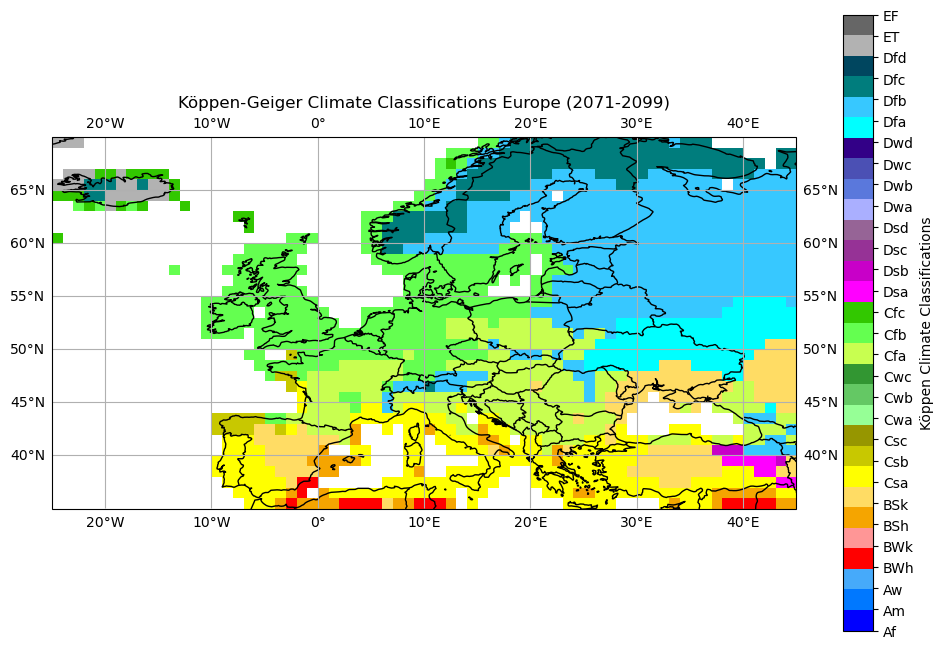

In [18]:
# Plot setup
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Add geographic features for context
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.gridlines(draw_labels=True)

# Adjust map extent for Europe
ax.set_extent([-25, 45, 35, 70], crs=ccrs.PlateCarree())  

# Plot the masked data
img = ax.imshow(masked_data, origin='upper', extent=extent, cmap=koppen_cmap, 
                transform=ccrs.PlateCarree(), vmin=1, vmax=30)

# Add a color bar
cbar = plt.colorbar(img, ax=ax, orientation='vertical', ticks=range(1, 31))
cbar.set_label('Köppen Climate Classifications')
cbar.ax.set_yticklabels(colors['Symbol'])  # Use Major Symbol for labels

# Set title
plt.title('Köppen-Geiger Climate Classifications Europe (2071-2099)')
plt.show()

### **Example 4: ERA5 climate reanalyis**

Global climate data, such as ERA5, is commonly stored in NetCDF (Network Common Data Form) format, which is widely used for multidimensional data due to its support for flexible data structures, efficient data access, and standardized metadata. In Python, `xarray` is essential for managing and analyzing this multidimensional dataset effectively. Here, we load and plot a small snippet of data from the ERA5 reanalysis with precipitation and temperature data over Germany for the year 2023.

If not unpacked already, the .7z file must be unpacked (use py7zr library).

In [19]:
import py7zr
with py7zr.SevenZipFile('../Datasets/ERA5_snippet.7z', mode='r', password='secret') as archive:
    archive.extractall(path='../Datasets/')

In [20]:
import xarray as xr
ERA5 = xr.open_dataset('../Datasets/ERA5_snippet.nc')

In [21]:
print(ERA5)

<xarray.Dataset>
Dimensions:    (longitude: 37, latitude: 33, time: 8760)
Coordinates:
  * longitude  (longitude) float32 6.0 6.25 6.5 6.75 ... 14.25 14.5 14.75 15.0
  * latitude   (latitude) float32 55.0 54.75 54.5 54.25 ... 47.5 47.25 47.0
  * time       (time) datetime64[ns] 2023-01-01 ... 2023-12-31T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-08-27 15:32:48 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...


In [22]:
print(ERA5['tp'])

<xarray.DataArray 'tp' (time: 8760, latitude: 33, longitude: 37)>
[10695960 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 6.0 6.25 6.5 6.75 ... 14.25 14.5 14.75 15.0
  * latitude   (latitude) float32 55.0 54.75 54.5 54.25 ... 47.5 47.25 47.0
  * time       (time) datetime64[ns] 2023-01-01 ... 2023-12-31T23:00:00
Attributes:
    units:      m
    long_name:  Total precipitation


In [23]:
print(ERA5['t2m'])

<xarray.DataArray 't2m' (time: 8760, latitude: 33, longitude: 37)>
[10695960 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 6.0 6.25 6.5 6.75 ... 14.25 14.5 14.75 15.0
  * latitude   (latitude) float32 55.0 54.75 54.5 54.25 ... 47.5 47.25 47.0
  * time       (time) datetime64[ns] 2023-01-01 ... 2023-12-31T23:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature


We first edit the data: convert temperature unit and resample the time series to daily means.

In [24]:
# convert K to °C
ERA5['t2m'] = ERA5['t2m'] - 273.15 

# Resample to daily means:
ERA5 = ERA5.resample(time='1D').mean()

Select a specific date to plot on map.

In [25]:
# select a specific date:
print(ERA5['t2m'][0,:,:]) # select by index
# or 
print(ERA5['t2m'].sel(time='2023-01-01')) # select by time component

<xarray.DataArray 't2m' (latitude: 33, longitude: 37)>
array([[10.080406 , 10.1426115, 10.200532 , ...,  9.363587 ,  9.417727 ,
         9.463875 ],
       [10.197414 , 10.162959 , 10.1415205, ...,  9.773895 ,  9.763213 ,
         9.7859   ],
       [10.142422 , 10.107615 ,  9.958409 , ...,  9.287388 ,  9.297486 ,
         9.580299 ],
       ...,
       [15.530579 , 15.404254 , 15.0325775, ...,  2.525772 ,  3.066415 ,
         3.521468 ],
       [15.810353 , 15.6116905, 14.300405 , ...,  1.6441994,  2.3566895,
         2.8182144],
       [14.8162155, 13.618897 , 12.2928705, ...,  2.5263176,  2.9383774,
         3.4465168]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 6.0 6.25 6.5 6.75 ... 14.25 14.5 14.75 15.0
  * latitude   (latitude) float32 55.0 54.75 54.5 54.25 ... 47.5 47.25 47.0
    time       datetime64[ns] 2023-01-01
<xarray.DataArray 't2m' (latitude: 33, longitude: 37)>
array([[10.080406 , 10.1426115, 10.200532 , ...,  9.363587 ,  9.417727 ,
         9.46387

Then, let's plot the data using matplotlib without any further customizations:

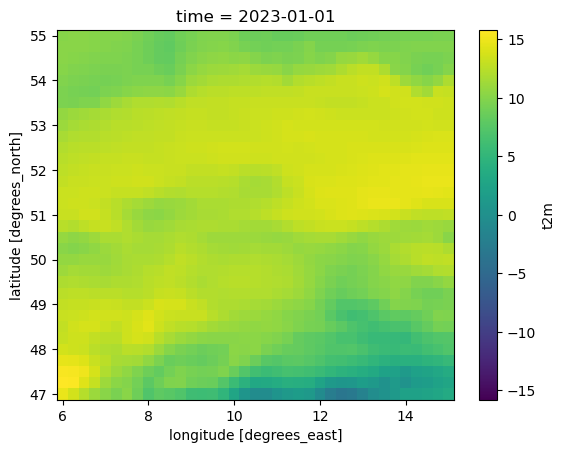

In [26]:
plt.figure()
ERA5['t2m'][0,:,:].plot(cmap='viridis')
plt.show()

Plot with cartopy & matplotlib:

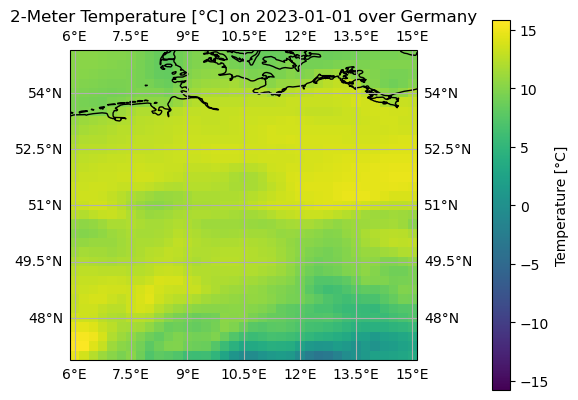

In [27]:
# Define figure
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot data
ERA5['t2m'][0, :, :].plot(ax=ax, cmap='viridis', 
                          cbar_kwargs={'label': 'Temperature [°C]', 'pad': 0.15})  # Adjust pad for spacing (to avoid overlap)

# Add coastlines and grid lines from cartopy
ax.coastlines()
ax.gridlines(draw_labels=True)

# Add title
plt.title('2-Meter Temperature [°C] on 2023-01-01 over Germany')

plt.show()

**Exercise:** Provide a map that shows precipitation over Germany (same or different day) and save the figure to the folder "Figures" after layout adjustements.

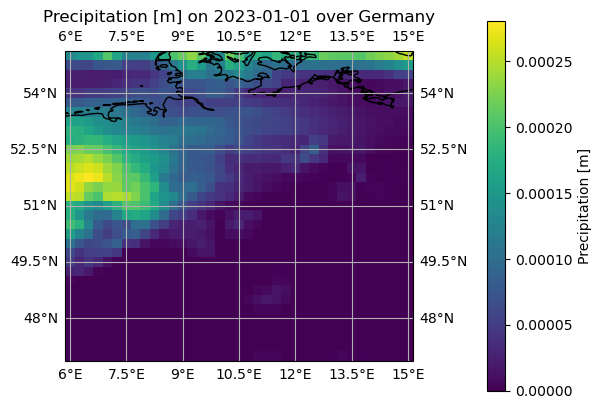

In [28]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot data
ERA5['tp'][0, :, :].plot(ax=ax, cmap='viridis', 
                         cbar_kwargs={'label': 'Precipitation [m]', 'pad': 0.15})  # Adjust pad for spacing (to avoid overlap)

# Add coastlines and grid lines from cartopy
ax.coastlines()
ax.gridlines(draw_labels=True)

# Add title
plt.title('Precipitation [m] on 2023-01-01 over Germany')

plt.show()

# Save figure to file
fig.savefig('Figures/ERA5_precipitation_Germany_2023-01-01.png', dpi=300, bbox_inches='tight')